In [96]:
%%time
import glob
import os
import pandas as pd
import geopandas as gpd
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib widget
import seaborn as sns

# for map
import contextily as cx

# for clustering
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics

Wall time: 2.99 ms


In [97]:
# csv = pd.read_csv("addressbase-plus-header.csv")

In [98]:
for file in os.listdir("."):  
    if zipfile.is_zipfile(file):
        with zipfile.ZipFile(file) as item: 
            item.extractall()

In [99]:
filepaths = [f for f in os.listdir(".") if f.endswith('.csv')]

In [100]:
filepaths

['Highstreets.csv',
 'SD8520.csv',
 'SD8525.csv',
 'SD9015.csv',
 'SD9020.csv',
 'SD9025.csv',
 'SD9030.csv',
 'SD9035.csv',
 'SD9510.csv',
 'SD9515.csv',
 'SD9520.csv',
 'SD9525.csv',
 'SD9530.csv',
 'SD9535.csv',
 'SD9540.csv',
 'SE0005.csv',
 'SE0010.csv',
 'SE0015.csv',
 'SE0020.csv',
 'SE0025.csv',
 'SE0030.csv',
 'SE0035.csv',
 'SE0040.csv',
 'SE0045.csv',
 'SE0050.csv',
 'SE0500.csv',
 'SE0505.csv',
 'SE0510.csv',
 'SE0515.csv',
 'SE0520.csv',
 'SE0525.csv',
 'SE0530.csv',
 'SE0535.csv',
 'SE0540.csv',
 'SE0545.csv',
 'SE0550.csv',
 'SE1000.csv',
 'SE1005.csv',
 'SE1010.csv',
 'SE1015.csv',
 'SE1020.csv',
 'SE1025.csv',
 'SE1030.csv',
 'SE1035.csv',
 'SE1040.csv',
 'SE1045.csv',
 'SE1500.csv',
 'SE1505.csv',
 'SE1510.csv',
 'SE1515.csv',
 'SE1520.csv',
 'SE1525.csv',
 'SE1530.csv',
 'SE1535.csv',
 'SE1540.csv',
 'SE1545.csv',
 'SE2005.csv',
 'SE2010.csv',
 'SE2015.csv',
 'SE2020.csv',
 'SE2025.csv',
 'SE2030.csv',
 'SE2035.csv',
 'SE2040.csv',
 'SE2045.csv',
 'SE2505.csv',
 'SE2

In [101]:
def f(i):
    return pd.read_csv(i, header=None, low_memory = False)

df = pd.concat(map(f, filepaths))

In [102]:
df

0           1             2             3           4   \
0             UPRN       CLASS  X_COORDINATE  Y_COORDINATE    LATITUDE   
1     100012732949        CR08     386846.92     422832.93  53.7017765   
2     100012732760        CR08      386842.0      422841.0  53.7018489   
3     100012732767        CR08      386808.0      422880.0  53.7021985   
4     100012732770        CR08      386812.0      422853.0   53.701956   
...            ...         ...           ...           ...         ...   
2402  100050112849  27435788.0             I           2.0  2001-09-16   
2403  200000617918  27437090.0             I           2.0  2001-09-16   
2404   10093601152  54568783.0             I           2.0  2018-08-29   
2405   10033217654         NaN             I           2.0  2005-11-15   
2406   10007238607         NaN             I           2.0  2007-12-14   

              5                                 6          7   \
0      LONGITUDE                   LA_ORGANISATION  TOWN_NAME   
1      -2.200708                               NaN      BACUP   
2     -2.2007828                    MRS POTTS CAFE      BACUP   
3     -2.2012995            CROWTHERS OPTOMETRISTS      BACUP   
4     -2.2012378  ANTHONY JOHNSON FUNERAL SERVICES      BACUP   
...          ...                               ...        ...   
2402        RD04                               NaN   471137.0   
2403        RD02                               NaN  471671.14   
2404        RD03                               NaN   471739.4   
2405        LM03                               NaN   471906.0   
2406          ZV                               NaN   470861.0   

                      8          9   ...   67   68   69         70         71  \
0     STREET_DESCRIPTION  dClusters  ...  NaN  NaN  NaN        NaN        NaN   
1            KING STREET          0  ...  NaN  NaN  NaN        NaN        NaN   
2            KING STREET          0  ...  NaN  NaN  NaN        NaN        NaN   
3          MARKET STREET          0  ...  NaN  NaN  NaN        NaN        NaN   
4          MARKET STREET          0  ...  NaN  NaN  NaN        NaN        NaN   
...                  ...        ...  ...  ...  ...  ...        ...        ...   
2402            455077.0  53.986874  ...   1G    D  NaN  E05001704  E04000481   
2403           455070.08  53.986738  ...   1A    D  NaN  E05001704  E04000481   
2404           455904.65  53.994228  ...   2B    D  NaN  E05001712  E04000474   
2405            455368.0  53.989382  ...  NaN    N  NaN  E05001704  E04000481   
2406            455412.0  53.989922  ...  NaN    N  NaN  E05010326  E04000609   

              72   73   74  75  76  
0            NaN  NaN  NaN NaN NaN  
1            NaN  NaN  NaN NaN NaN  
2            NaN  NaN  NaN NaN NaN  
3            NaN  NaN  NaN NaN NaN  
4            NaN  NaN  NaN NaN NaN  
...          ...  ...  ...  ..  ..  
2402  2012-03-19  0.0  NaN NaN NaN  
2403  2012-03-19  0.0  NaN NaN NaN  
2404  2018-05-31  0.0  NaN NaN NaN  
2405         NaN  0.0  NaN NaN NaN  
2406         NaN  0.0  NaN NaN NaN  

[1549541 rows x 77 columns]

In [103]:
headers = pd.read_csv(r'C:\Users\annaz\OneDrive\Uni (Leeds)\Creative Coding\Hackathon 1\addressbase-plus-header.csv')

In [104]:
list_of_names = list(headers)

In [105]:
df.columns = list_of_names

In [106]:
df

UPRN       UDPRN   CHANGE_TYPE         STATE  STATE_DATE  \
0             UPRN       CLASS  X_COORDINATE  Y_COORDINATE    LATITUDE   
1     100012732949        CR08     386846.92     422832.93  53.7017765   
2     100012732760        CR08      386842.0      422841.0  53.7018489   
3     100012732767        CR08      386808.0      422880.0  53.7021985   
4     100012732770        CR08      386812.0      422853.0   53.701956   
...            ...         ...           ...           ...         ...   
2402  100050112849  27435788.0             I           2.0  2001-09-16   
2403  200000617918  27437090.0             I           2.0  2001-09-16   
2404   10093601152  54568783.0             I           2.0  2018-08-29   
2405   10033217654         NaN             I           2.0  2005-11-15   
2406   10007238607         NaN             I           2.0  2007-12-14   

           CLASS                       PARENT_UPRN X_COORDINATE  \
0      LONGITUDE                   LA_ORGANISATION    TOWN_NAME   
1      -2.200708                               NaN        BACUP   
2     -2.2007828                    MRS POTTS CAFE        BACUP   
3     -2.2012995            CROWTHERS OPTOMETRISTS        BACUP   
4     -2.2012378  ANTHONY JOHNSON FUNERAL SERVICES        BACUP   
...          ...                               ...          ...   
2402        RD04                               NaN     471137.0   
2403        RD02                               NaN    471671.14   
2404        RD03                               NaN     471739.4   
2405        LM03                               NaN     471906.0   
2406          ZV                               NaN     470861.0   

            Y_COORDINATE   LATITUDE  ... DELIVERY_POINT_SUFFIX  \
0     STREET_DESCRIPTION  dClusters  ...                   NaN   
1            KING STREET          0  ...                   NaN   
2            KING STREET          0  ...                   NaN   
3          MARKET STREET          0  ...                   NaN   
4          MARKET STREET          0  ...                   NaN   
...                  ...        ...  ...                   ...   
2402            455077.0  53.986874  ...                    1G   
2403           455070.08  53.986738  ...                    1A   
2404           455904.65  53.994228  ...                    2B   
2405            455368.0  53.989382  ...                   NaN   
2406            455412.0  53.989922  ...                   NaN   

      ADDRESSBASE_POSTAL  PO_BOX_NUMBER  WARD_CODE PARISH_CODE RM_START_DATE  \
0                    NaN            NaN        NaN         NaN           NaN   
1                    NaN            NaN        NaN         NaN           NaN   
2                    NaN            NaN        NaN         NaN           NaN   
3                    NaN            NaN        NaN         NaN           NaN   
4                    NaN            NaN        NaN         NaN           NaN   
...                  ...            ...        ...         ...           ...   
2402                   D            NaN  E05001704   E04000481    2012-03-19   
2403                   D            NaN  E05001704   E04000481    2012-03-19   
2404                   D            NaN  E05001712   E04000474    2018-05-31   
2405                   N            NaN  E05001704   E04000481           NaN   
2406                   N            NaN  E05010326   E04000609           NaN   

     MULTI_OCC_COUNT VOA_NDR_P_DESC_CODE VOA_NDR_SCAT_CODE ALT_LANGUAGE  
0                NaN                 NaN               NaN          NaN  
1                NaN                 NaN               NaN          NaN  
2                NaN                 NaN               NaN          NaN  
3                NaN                 NaN               NaN          NaN  
4                NaN                 NaN               NaN          NaN  
...              ...                 ...               ...          ...  
2402             0.0                 NaN        

In [107]:
df_address = df[['UPRN', 'CLASS', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE', 'LA_ORGANISATION', 'TOWN_NAME', 'STREET_DESCRIPTION']]
df_address

UPRN       CLASS X_COORDINATE        Y_COORDINATE   LATITUDE  \
0             UPRN   LONGITUDE    TOWN_NAME  STREET_DESCRIPTION  dClusters   
1     100012732949   -2.200708        BACUP         KING STREET          0   
2     100012732760  -2.2007828        BACUP         KING STREET          0   
3     100012732767  -2.2012995        BACUP       MARKET STREET          0   
4     100012732770  -2.2012378        BACUP       MARKET STREET          0   
...            ...         ...          ...                 ...        ...   
2402  100050112849        RD04     471137.0            455077.0  53.986874   
2403  200000617918        RD02    471671.14           455070.08  53.986738   
2404   10093601152        RD03     471739.4           455904.65  53.994228   
2405   10033217654        LM03     471906.0            455368.0  53.989382   
2406   10007238607          ZV     470861.0            455412.0  53.989922   

                        LONGITUDE LA_ORGANISATION        TOWN_NAME  \
0                        geometry             NaN              NaN   
1     POINT (386846.92 422832.93)             NaN              NaN   
2           POINT (386842 422841)             NaN              NaN   
3           POINT (386808 422880)             NaN              NaN   
4           POINT (386812 422853)             NaN              NaN   
...                           ...             ...              ...   
2402                    -0.916611             NaN  STAMFORD BRIDGE   
2403                    -0.908469             NaN  STAMFORD BRIDGE   
2404                    -0.907232             NaN  STAMFORD BRIDGE   
2405                    -0.904817             NaN  STAMFORD BRIDGE   
2406                    -0.920742             NaN             YORK   

     STREET_DESCRIPTION  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
2402    LOW CATTON ROAD  
2403        MORCAR ROAD  
2404   LUND SIKES GROVE  
2405    WHITEROSE DRIVE  
2406       SCOREBY LANE  

[1549541 rows x 9 columns]

In [108]:
df_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549541 entries, 0 to 2406
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   UPRN                1549541 non-null  object
 1   CLASS               1549541 non-null  object
 2   X_COORDINATE        1549541 non-null  object
 3   Y_COORDINATE        1549541 non-null  object
 4   LATITUDE            1549541 non-null  object
 5   LONGITUDE           1549541 non-null  object
 6   LA_ORGANISATION     68034 non-null    object
 7   TOWN_NAME           1542450 non-null  object
 8   STREET_DESCRIPTION  1542462 non-null  object
dtypes: object(9)
memory usage: 118.2+ MB


In [109]:
df_address["CLASS_IS_CR"] = df_address["CLASS"].str.startswith('CR')

C:\Users\annaz\AppData\Local\Temp/ipykernel_18804/3341489659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_address["CLASS_IS_CR"] = df_address["CLASS"].str.startswith('CR')


In [110]:
df_address

UPRN       CLASS X_COORDINATE        Y_COORDINATE   LATITUDE  \
0             UPRN   LONGITUDE    TOWN_NAME  STREET_DESCRIPTION  dClusters   
1     100012732949   -2.200708        BACUP         KING STREET          0   
2     100012732760  -2.2007828        BACUP         KING STREET          0   
3     100012732767  -2.2012995        BACUP       MARKET STREET          0   
4     100012732770  -2.2012378        BACUP       MARKET STREET          0   
...            ...         ...          ...                 ...        ...   
2402  100050112849        RD04     471137.0            455077.0  53.986874   
2403  200000617918        RD02    471671.14           455070.08  53.986738   
2404   10093601152        RD03     471739.4           455904.65  53.994228   
2405   10033217654        LM03     471906.0            455368.0  53.989382   
2406   10007238607          ZV     470861.0            455412.0  53.989922   

                        LONGITUDE LA_ORGANISATION        TOWN_NAME  \
0                        geometry             NaN              NaN   
1     POINT (386846.92 422832.93)             NaN              NaN   
2           POINT (386842 422841)             NaN              NaN   
3           POINT (386808 422880)             NaN              NaN   
4           POINT (386812 422853)             NaN              NaN   
...                           ...             ...              ...   
2402                    -0.916611             NaN  STAMFORD BRIDGE   
2403                    -0.908469             NaN  STAMFORD BRIDGE   
2404                    -0.907232             NaN  STAMFORD BRIDGE   
2405                    -0.904817             NaN  STAMFORD BRIDGE   
2406                    -0.920742             NaN             YORK   

     STREET_DESCRIPTION  CLASS_IS_CR  
0                   NaN        False  
1                   NaN        False  
2                   NaN        False  
3                   NaN        False  
4                   NaN        False  
...                 ...          ...  
2402    LOW CATTON ROAD        False  
2403        MORCAR ROAD        False  
2404   LUND SIKES GROVE        False  
2405    WHITEROSE DRIVE        False  
2406       SCOREBY LANE        False  

[1549541 rows x 10 columns]

In [111]:
df_CR = df_address[df_address['CLASS_IS_CR'] == True]
df_CR

UPRN CLASS X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  \
58     10014224109  CR08     386638.0     422130.0  53.695453 -2.203842   
170    10014329966  CR02     387347.0     422391.0  53.697817 -2.193115   
217   100012732949  CR08    386846.92    422832.93  53.701777 -2.200708   
264   100012733170  CR08     386927.0     423006.0  53.703334 -2.199502   
276   100012733161  CR08     386917.0     423018.0  53.703442 -2.199654   
...            ...   ...          ...          ...        ...       ...   
1967  100052170425  CR08     471374.0     455547.0  53.991065 -0.912888   
2106   10091014259  CR08    471243.79    455547.24  53.991084 -0.914873   
2109  100052201551  CR08     471251.0     455598.0   53.99154 -0.914752   
2113   10000074291  CR06     471281.0     455554.0   53.99114 -0.914304   
2254   10090674352  CR08    473253.16    458241.88  54.015017 -0.883585   

                             LA_ORGANISATION        TOWN_NAME  \
58                               TOOLSTATION            BACUP   
170               MCDERMOTT DEVELOPMENTS LTD            BACUP   
217                                      NaN            BACUP   
264                                    TENON            BACUP   
276   WOODCOCK, HAWORTH & NUTTALL SOLICITORS            BACUP   
...                                      ...              ...   
1967                               HAIR 2000  STAMFORD BRIDGE   
2106                             WHISKY SHOP  STAMFORD BRIDGE   
2109                         MAYNEWS LIMITED  STAMFORD BRIDGE   
2113                          SIZZLING PLATE  STAMFORD BRIDGE   
2254                                     NaN           MALTON   

                          STREET_DESCRIPTION  CLASS_IS_CR  
58                                 PARK ROAD         True  
170                            FIELDFARE WAY         True  
217                              KING STREET         True  
264                           IRWELL TERRACE         True  
276                           IRWELL TERRACE         True  
...                                      ...          ...  
1967                             MAIN STREET         True  
2106                              THE SQUARE         True  
2109                              THE SQUARE         True  
2113                              THE SQUARE         True  
2254  STAMFORD BRIDGE TO BUTTERCRAMBE BRIDGE         True  

[31953 rows x 10 columns]

In [112]:
%%time
gdf = gpd.GeoDataFrame(df_CR, geometry = gpd.points_from_xy(df_CR.X_COORDINATE, df_CR.Y_COORDINATE), crs = "EPSG:27700")

Wall time: 117 ms


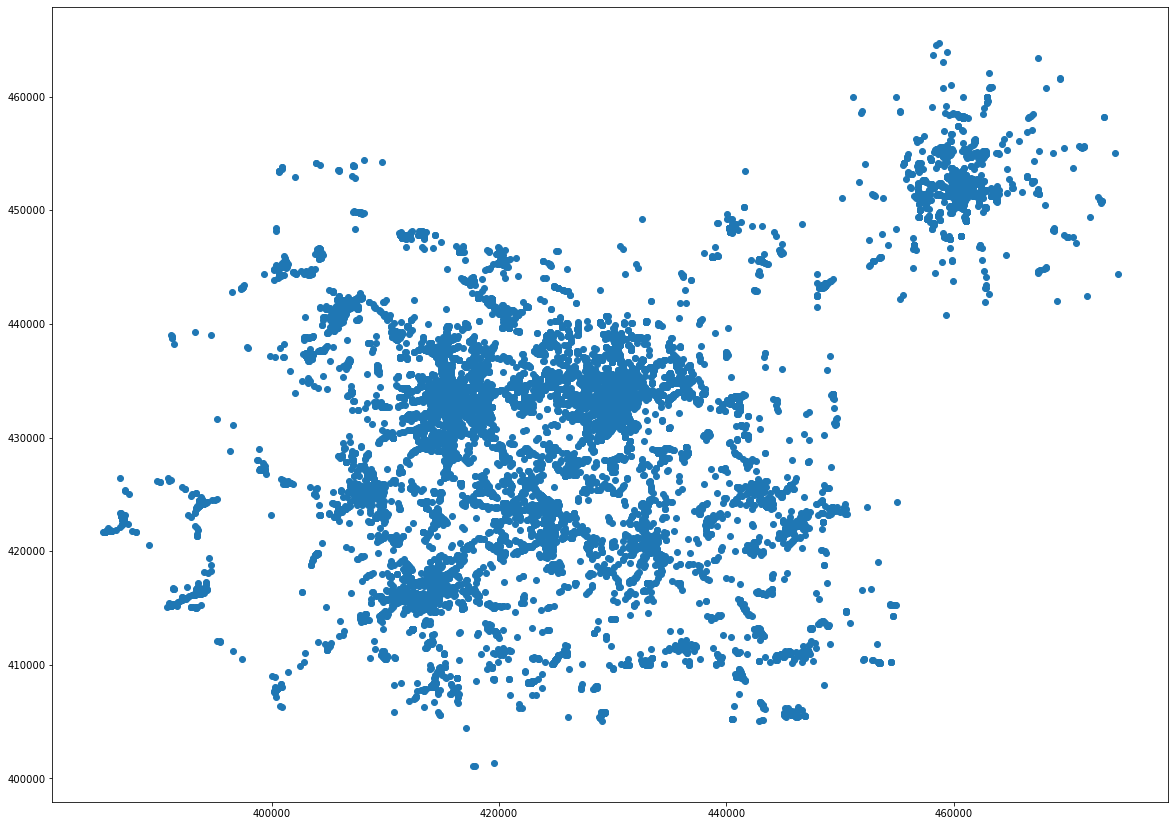

Wall time: 6.99 s


In [113]:
%%time
gdf.plot(figsize = (20,20))

#plt.savefig('gdf_plot')

plt.show()

Wall time: 9.32 s


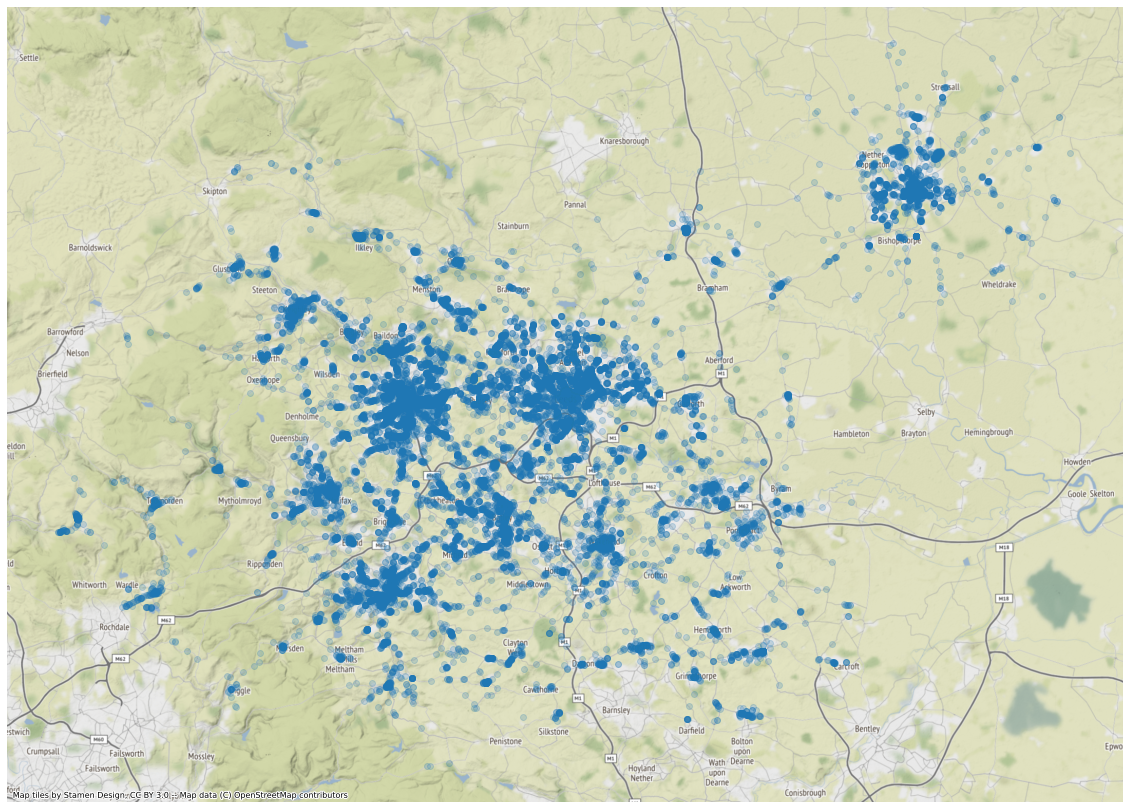

In [114]:
%%time
fig, ax = plt.subplots(1, figsize = (20,20))
gdf.plot(ax = ax, alpha=0.2)
cx.add_basemap(ax, crs = gdf.crs)
ax.set_axis_off()

In [115]:
gdf

UPRN CLASS X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  \
58     10014224109  CR08     386638.0     422130.0  53.695453 -2.203842   
170    10014329966  CR02     387347.0     422391.0  53.697817 -2.193115   
217   100012732949  CR08    386846.92    422832.93  53.701777 -2.200708   
264   100012733170  CR08     386927.0     423006.0  53.703334 -2.199502   
276   100012733161  CR08     386917.0     423018.0  53.703442 -2.199654   
...            ...   ...          ...          ...        ...       ...   
1967  100052170425  CR08     471374.0     455547.0  53.991065 -0.912888   
2106   10091014259  CR08    471243.79    455547.24  53.991084 -0.914873   
2109  100052201551  CR08     471251.0     455598.0   53.99154 -0.914752   
2113   10000074291  CR06     471281.0     455554.0   53.99114 -0.914304   
2254   10090674352  CR08    473253.16    458241.88  54.015017 -0.883585   

                             LA_ORGANISATION        TOWN_NAME  \
58                               TOOLSTATION            BACUP   
170               MCDERMOTT DEVELOPMENTS LTD            BACUP   
217                                      NaN            BACUP   
264                                    TENON            BACUP   
276   WOODCOCK, HAWORTH & NUTTALL SOLICITORS            BACUP   
...                                      ...              ...   
1967                               HAIR 2000  STAMFORD BRIDGE   
2106                             WHISKY SHOP  STAMFORD BRIDGE   
2109                         MAYNEWS LIMITED  STAMFORD BRIDGE   
2113                          SIZZLING PLATE  STAMFORD BRIDGE   
2254                                     NaN           MALTON   

                          STREET_DESCRIPTION  CLASS_IS_CR  \
58                                 PARK ROAD         True   
170                            FIELDFARE WAY         True   
217                              KING STREET         True   
264                           IRWELL TERRACE         True   
276                           IRWELL TERRACE         True   
...                                      ...          ...   
1967                             MAIN STREET         True   
2106                              THE SQUARE         True   
2109                              THE SQUARE         True   
2113                              THE SQUARE         True   
2254  STAMFORD BRIDGE TO BUTTERCRAMBE BRIDGE         True   

                           geometry  
58    POINT (386638.000 422130.000)  
170   POINT (387347.000 422391.000)  
217   POINT (386846.920 422832.930)  
264   POINT (386927.000 423006.000)  
276   POINT (386917.000 423018.000)  
...                             ...  
1967  POINT (471374.000 455547.000)  
2106  POINT (471243.790 455547.240)  
2109  POINT (471251.000 455598.000)  
2113  POINT (471281.000 455554.000)  
2254  POINT (473253.160 458241.880)  

[31953 rows x 11 columns]

In [116]:
v = gdf.TOWN_NAME.value_counts()

In [117]:
gdf2 = gdf[gdf.TOWN_NAME.isin(v.index[v.gt(15)])]

In [118]:
gdf2 is gdf

False

In [119]:
len(gdf)

31953

In [120]:
len(gdf2)

31892

In [121]:
print(v)

LEEDS              7508
BRADFORD           5198
HUDDERSFIELD       2925
YORK               2729
HALIFAX            1267
                   ... 
KIRKBY OVERBLOW       1
DUNKESWICK            1
WEETON                1
DELPH                 1
FULL SUTTON           1
Name: TOWN_NAME, Length: 76, dtype: int64


In [122]:
gdf2.TOWN_NAME.value_counts()

LEEDS                    7508
BRADFORD                 5198
HUDDERSFIELD             2925
YORK                     2729
HALIFAX                  1267
WAKEFIELD                1228
KEIGHLEY                 1140
DEWSBURY                  943
PONTEFRACT                719
BATLEY                    708
SHIPLEY                   526
CASTLEFORD                484
PUDSEY                    483
BARNSLEY                  477
MORLEY                    463
BRIGHOUSE                 445
HOLMFIRTH                 401
ILKLEY                    397
CLECKHEATON               342
BINGLEY                   328
OTLEY                     318
WETHERBY                  298
HECKMONDWIKE              231
MIRFIELD                  220
TODMORDEN                 214
ELLAND                    197
HEBDEN BRIDGE             196
SOWERBY BRIDGE            195
BACUP                     168
BAILDON                   148
LIVERSEDGE                137
OSSETT                    136
LITTLEBOROUGH             129
SILSDEN   

In [123]:
v2 = gdf.STREET_DESCRIPTION.value_counts()

In [124]:
gdf3 = gdf2[gdf2.STREET_DESCRIPTION.isin(v2.index[v2.gt(15)])]

In [125]:
gdf3.STREET_DESCRIPTION.value_counts()

BRADFORD ROAD       748
LEEDS ROAD          633
KIRKGATE            593
HIGH STREET         523
MAIN STREET         511
                   ... 
GREEN ROAD           16
NELSON STREET        16
CLECKHEATON ROAD     16
QUEENS ARCADE        16
AIRE STREET          16
Name: STREET_DESCRIPTION, Length: 370, dtype: int64

Wall time: 6.92 s


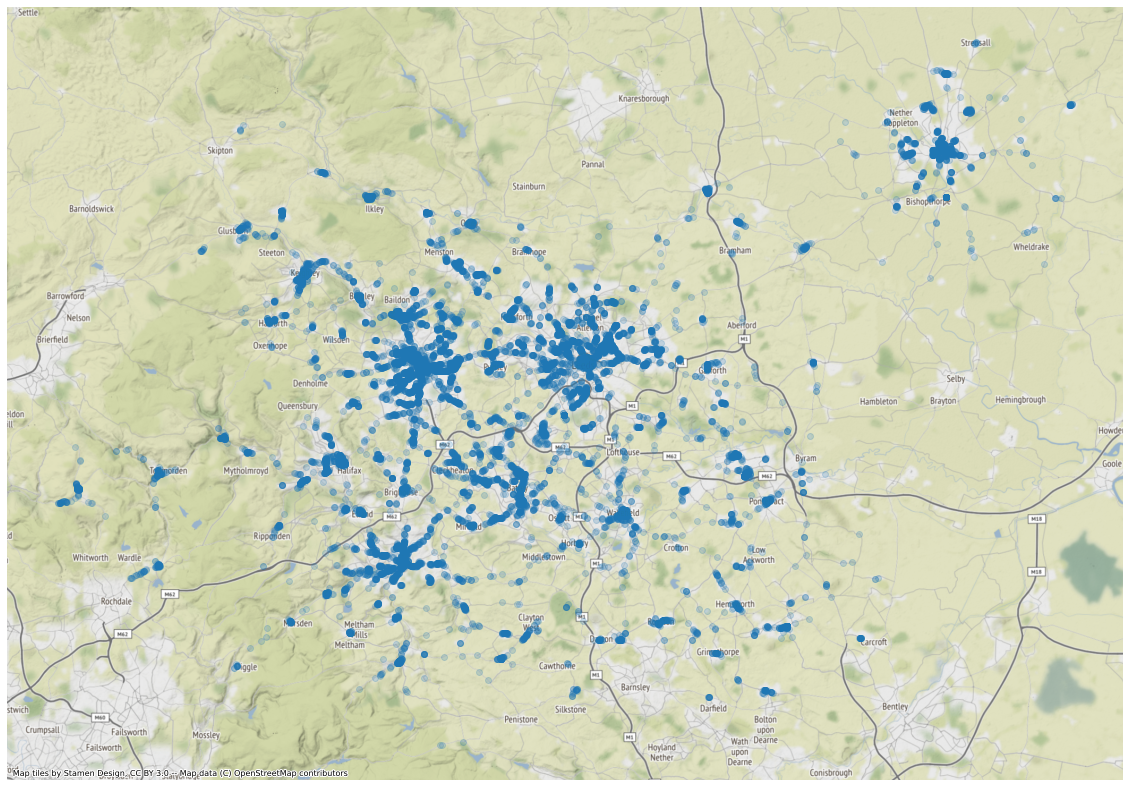

In [126]:
%%time
fig, ax = plt.subplots(1, figsize = (20,20))
gdf3.plot(ax = ax, alpha=0.2)
cx.add_basemap(ax, crs = gdf3.crs)
ax.set_axis_off()

In [127]:
gdf_cluster = gdf3[['UPRN', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE']]

In [128]:
dbscan = DBSCAN(eps=150, min_samples=15) 

In [129]:
dbscan.fit(gdf_cluster) 

DBSCAN(eps=150, min_samples=15)

In [130]:
dbscan_labels = dbscan.labels_

In [131]:
metrics.silhouette_score(gdf_cluster, dbscan_labels)

-0.41791440677553066

In [132]:
gdf_cluster['dClusters'] = dbscan_labels

C:\Users\annaz\AppData\Local\Temp/ipykernel_18804/2963497147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_cluster['dClusters'] = dbscan_labels


Wall time: 13.1 s


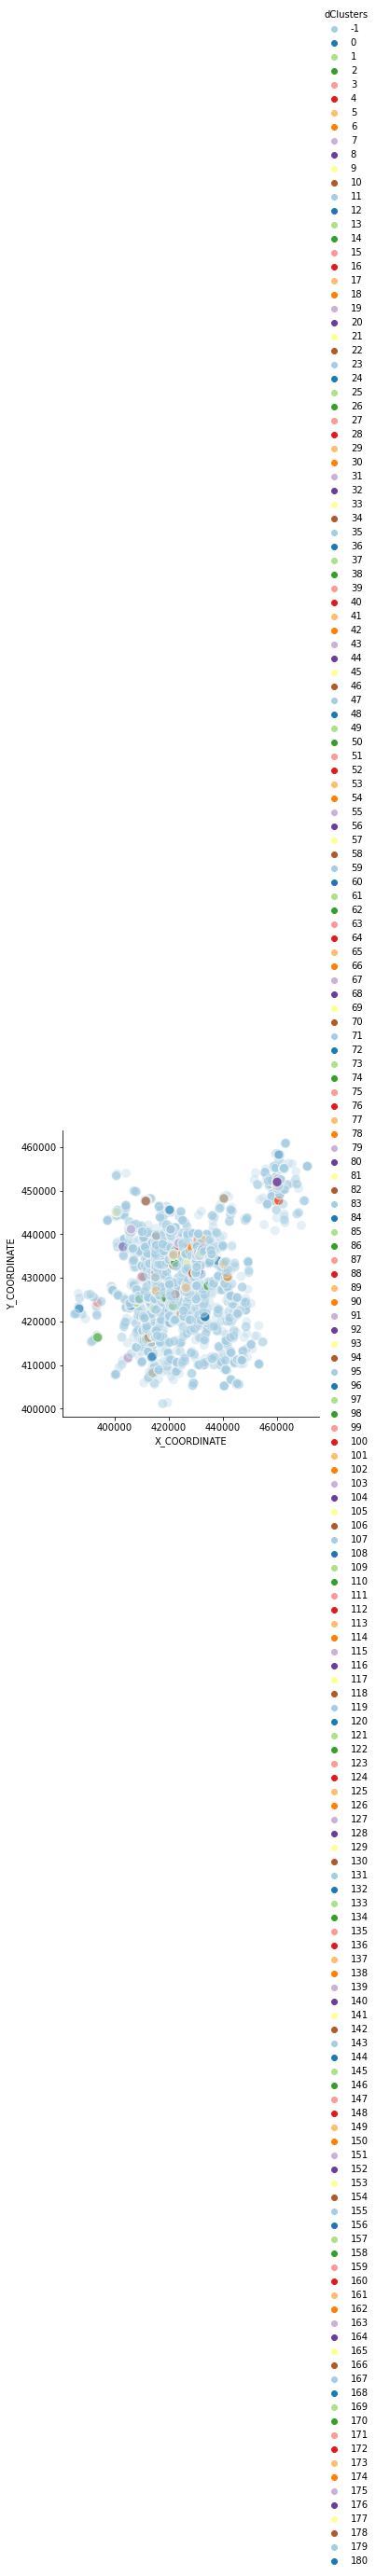

In [133]:
%%time
fig = sns.relplot(data = gdf_cluster, x = "X_COORDINATE", y = "Y_COORDINATE", s = 100, hue = "dClusters", palette = "Paired", alpha = 0.3) 

In [134]:
gdf_cluster.head()

UPRN X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  dClusters
58    10014224109     386638.0     422130.0  53.695453 -2.203842         -1
217  100012732949    386846.92    422832.93  53.701777 -2.200708          0
293  100012732760     386842.0     422841.0  53.701849 -2.200783          0
441  100012733221     388003.0     421686.0  53.691496 -2.183152         -1
664   10014333653     386802.0     422944.0  53.702774 -2.201393         -1

In [135]:
gdf_cluster2 = gdf_cluster[gdf_cluster['dClusters'] >= 0]

In [136]:
gdf_cluster2

UPRN X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  dClusters
217   100012732949    386846.92    422832.93  53.701777 -2.200708          0
293   100012732760     386842.0     422841.0  53.701849 -2.200783          0
669   100012732767     386808.0     422880.0  53.702199   -2.2013          0
705   100012732770     386812.0     422853.0  53.701956 -2.201238          0
736   100012732977     386846.0     422951.0  53.702838 -2.200727          0
...            ...          ...          ...        ...       ...        ...
9157  100052169806    460760.36     458206.3  54.016315 -1.074214        180
9197  100052169821    460824.51    458164.52  54.015932 -1.073244        180
9250  100052169825    460815.77    458229.54  54.016518 -1.073364        180
9258  100052169811    460785.98    458242.62  54.016639 -1.073816        180
9286  100052169809    460807.78    458253.52  54.016734 -1.073481        180

[7078 rows x 6 columns]

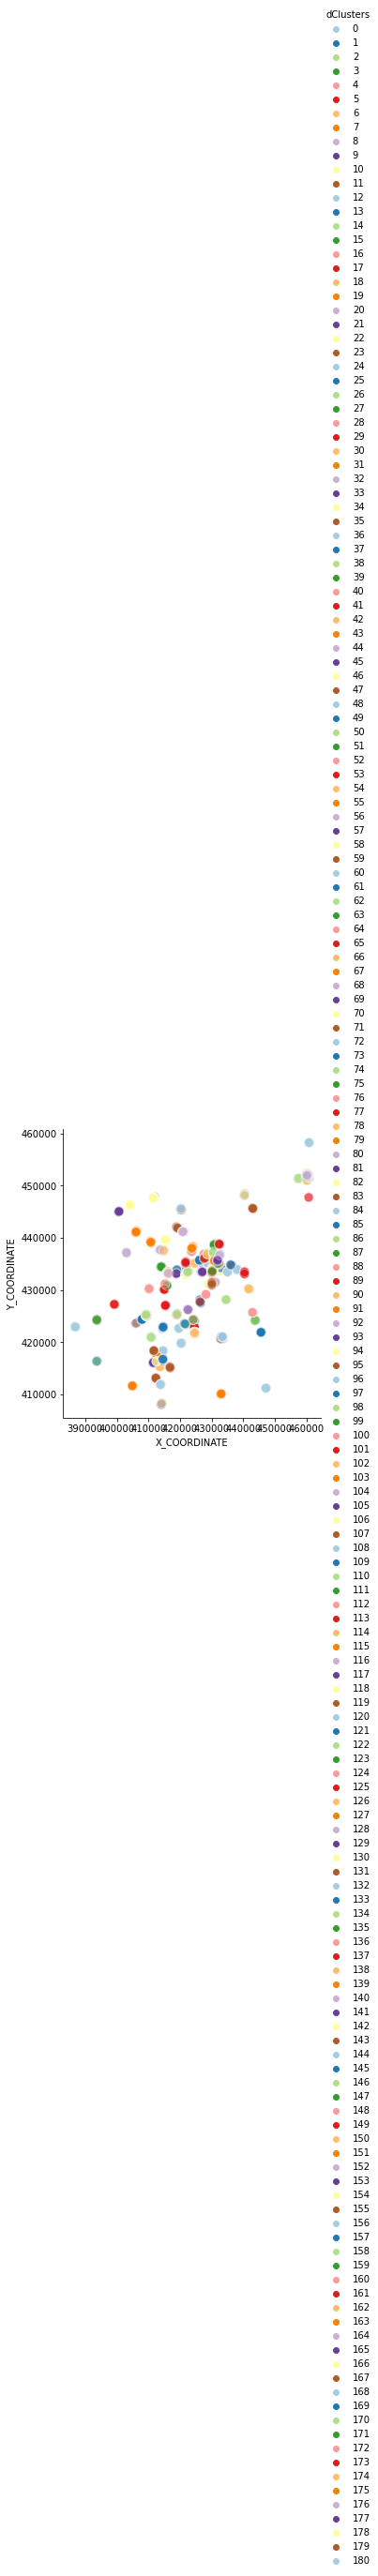

Wall time: 18.2 s


In [137]:
%%time
fig = sns.relplot(data = gdf_cluster2, x = "X_COORDINATE", y = "Y_COORDINATE", s = 100, hue = "dClusters", palette = "Paired", alpha = 0.3)
#plt.savefig('DBScan')
plt.show()

In [138]:
gdf_cluster2

UPRN X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  dClusters
217   100012732949    386846.92    422832.93  53.701777 -2.200708          0
293   100012732760     386842.0     422841.0  53.701849 -2.200783          0
669   100012732767     386808.0     422880.0  53.702199   -2.2013          0
705   100012732770     386812.0     422853.0  53.701956 -2.201238          0
736   100012732977     386846.0     422951.0  53.702838 -2.200727          0
...            ...          ...          ...        ...       ...        ...
9157  100052169806    460760.36     458206.3  54.016315 -1.074214        180
9197  100052169821    460824.51    458164.52  54.015932 -1.073244        180
9250  100052169825    460815.77    458229.54  54.016518 -1.073364        180
9258  100052169811    460785.98    458242.62  54.016639 -1.073816        180
9286  100052169809    460807.78    458253.52  54.016734 -1.073481        180

[7078 rows x 6 columns]

In [139]:
%%time
clustered = gpd.GeoDataFrame(gdf_cluster2, geometry = gpd.points_from_xy(gdf_cluster2.X_COORDINATE, gdf_cluster2.Y_COORDINATE), crs = "EPSG:27700")

Wall time: 31.6 ms


In [140]:
clustered

UPRN X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  dClusters  \
217   100012732949    386846.92    422832.93  53.701777 -2.200708          0   
293   100012732760     386842.0     422841.0  53.701849 -2.200783          0   
669   100012732767     386808.0     422880.0  53.702199   -2.2013          0   
705   100012732770     386812.0     422853.0  53.701956 -2.201238          0   
736   100012732977     386846.0     422951.0  53.702838 -2.200727          0   
...            ...          ...          ...        ...       ...        ...   
9157  100052169806    460760.36     458206.3  54.016315 -1.074214        180   
9197  100052169821    460824.51    458164.52  54.015932 -1.073244        180   
9250  100052169825    460815.77    458229.54  54.016518 -1.073364        180   
9258  100052169811    460785.98    458242.62  54.016639 -1.073816        180   
9286  100052169809    460807.78    458253.52  54.016734 -1.073481        180   

                           geometry  
217   POINT (386846.920 422832.930)  
293   POINT (386842.000 422841.000)  
669   POINT (386808.000 422880.000)  
705   POINT (386812.000 422853.000)  
736   POINT (386846.000 422951.000)  
...                             ...  
9157  POINT (460760.360 458206.300)  
9197  POINT (460824.510 458164.520)  
9250  POINT (460815.770 458229.540)  
9258  POINT (460785.980 458242.620)  
9286  POINT (460807.780 458253.520)  

[7078 rows x 7 columns]

In [141]:
#clustered.to_csv('clustered.csv')

In [142]:
%matplotlib inline

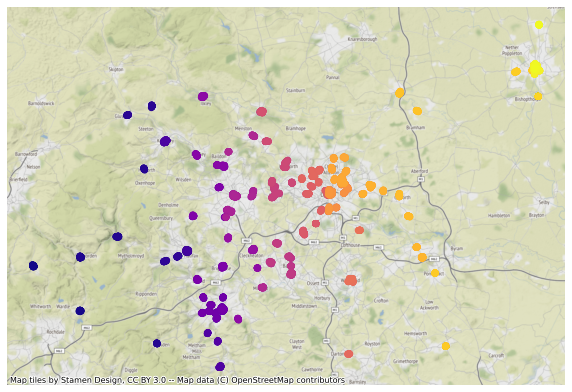

Wall time: 4.47 s


In [143]:
%%time
fig, ax = plt.subplots(1, figsize = (10,10))
clustered.plot(ax = ax, c = clustered["dClusters"], cmap = 'plasma')
cx.add_basemap(ax, crs = clustered.crs)
ax.set_axis_off()

#plt.savefig('gdf_basemap')

plt.show()

In [144]:
clust = clustered[['UPRN', 'LATITUDE', 'LONGITUDE', 'dClusters']]
clust

UPRN   LATITUDE LONGITUDE  dClusters
217   100012732949  53.701777 -2.200708          0
293   100012732760  53.701849 -2.200783          0
669   100012732767  53.702199   -2.2013          0
705   100012732770  53.701956 -2.201238          0
736   100012732977  53.702838 -2.200727          0
...            ...        ...       ...        ...
9157  100052169806  54.016315 -1.074214        180
9197  100052169821  54.015932 -1.073244        180
9250  100052169825  54.016518 -1.073364        180
9258  100052169811  54.016639 -1.073816        180
9286  100052169809  54.016734 -1.073481        180

[7078 rows x 4 columns]

In [145]:
import folium
from folium.plugins import MarkerCluster

In [146]:
m = folium.Map(location=[53.8578, -1.5023], tiles = 'OpenStreetMap', zoom_start=9, control_scale=True)

In [147]:
# Create a list of coordinate pairs
locations = list(zip(clust["LATITUDE"], clust["LONGITUDE"]))
locations

[(53.7017765, -2.200708),
 (53.7018489, -2.2007828),
 (53.7021985, -2.2012995),
 (53.701956, -2.2012378),
 (53.7028376, -2.200727),
 (53.7032951, -2.2012896),
 (53.7040844, -2.2022477),
 (53.7041563, -2.2022784),
 (53.7033938, -2.2013961),
 (53.703304, -2.2013503),
 (53.7031081, -2.2002133),
 (53.7029734, -2.200152),
 (53.7027939, -2.1999997),
 (53.7025073, -2.1994076),
 (53.7024154, -2.2006189),
 (53.7024063, -2.2006946),
 (53.7015525, -2.2006451),
 (53.7018603, -2.1993439),
 (53.7016277, -2.1986915),
 (53.7021662, -2.1991182),
 (53.7021124, -2.1990725),
 (53.7017942, -2.2012219),
 (53.7026569, -2.201332),
 (53.702567, -2.2013316),
 (53.7027108, -2.2013474),
 (53.7020996, -2.2013293),
 (53.7030973, -2.2013341),
 (53.7026682, -2.1999234),
 (53.7025875, -2.1998321),
 (53.702633, -2.1994839),
 (53.7026324, -2.1998626),
 (53.7025882, -2.1993928),
 (53.7020376, -2.200814),
 (53.7023458, -2.199225),
 (53.7022705, -2.2012847),
 (53.7027736, -2.2013932),
 (53.7031782, -2.2013042),
 (53.702837

In [148]:
MarkerCluster(locations, show=True).add_to(m)

In [149]:
m

In [150]:
#outfp = "interactive_clust.html"
#m.save(outfp)

In [151]:
csv = gdf3.merge(clust.set_index('UPRN'), on = 'UPRN')
csv.head()

UPRN CLASS X_COORDINATE Y_COORDINATE LATITUDE_x LONGITUDE_x  \
0  100012732949  CR08    386846.92    422832.93  53.701777   -2.200708   
1  100012732760  CR08     386842.0     422841.0  53.701849   -2.200783   
2  100012732767  CR08     386808.0     422880.0  53.702199     -2.2013   
3  100012732770  CR08     386812.0     422853.0  53.701956   -2.201238   
4  100012732977  CR01     386846.0     422951.0  53.702838   -2.200727   

                    LA_ORGANISATION TOWN_NAME STREET_DESCRIPTION  CLASS_IS_CR  \
0                               NaN     BACUP        KING STREET         True   
1                    MRS POTTS CAFE     BACUP        KING STREET         True   
2            CROWTHERS OPTOMETRISTS     BACUP      MARKET STREET         True   
3  ANTHONY JOHNSON FUNERAL SERVICES     BACUP      MARKET STREET         True   
4                          BARCLAYS     BACUP      MARKET STREET         True   

                        geometry LATITUDE_y LONGITUDE_y  dClusters  
0  POINT (386846.920 422832.930)  53.701777   -2.200708          0  
1  POINT (386842.000 422841.000)  53.701849   -2.200783          0  
2  POINT (386808.000 422880.000)  53.702199     -2.2013          0  
3  POINT (386812.000 422853.000)  53.701956   -2.201238          0  
4  POINT (386846.000 422951.000)  53.702838   -2.200727          0

In [152]:
csv2 = csv[['UPRN', 'CLASS', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE_x', 'LONGITUDE_x', 'LA_ORGANISATION', 'TOWN_NAME', 'STREET_DESCRIPTION', 'dClusters', 'geometry']]
csv3 = csv2.rename({'LATITUDE_x': 'LATITUDE', 'LONGITUDE_x':'LONGITUDE'}, axis = 1)
csv3.head()

UPRN CLASS X_COORDINATE Y_COORDINATE   LATITUDE LONGITUDE  \
0  100012732949  CR08    386846.92    422832.93  53.701777 -2.200708   
1  100012732760  CR08     386842.0     422841.0  53.701849 -2.200783   
2  100012732767  CR08     386808.0     422880.0  53.702199   -2.2013   
3  100012732770  CR08     386812.0     422853.0  53.701956 -2.201238   
4  100012732977  CR01     386846.0     422951.0  53.702838 -2.200727   

                    LA_ORGANISATION TOWN_NAME STREET_DESCRIPTION  dClusters  \
0                               NaN     BACUP        KING STREET          0   
1                    MRS POTTS CAFE     BACUP        KING STREET          0   
2            CROWTHERS OPTOMETRISTS     BACUP      MARKET STREET          0   
3  ANTHONY JOHNSON FUNERAL SERVICES     BACUP      MARKET STREET          0   
4                          BARCLAYS     BACUP      MARKET STREET          0   

                        geometry  
0  POINT (386846.920 422832.930)  
1  POINT (386842.000 422841.000)  
2  POINT (386808.000 422880.000)  
3  POINT (386812.000 422853.000)  
4  POINT (386846.000 422951.000)

In [155]:
#csv3.to_csv('Highstreets.csv', index = False)